In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
descriptions = pd.read_csv('dataset/data_descriptions.csv')
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [3]:
descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly ba...
2,TotalCharges,Feature,float,The total charges incurred by the user over th...
3,SubscriptionType,Feature,object,The type of subscription chosen by the user (B...
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paper...
6,ContentType,Feature,string,The type of content preferred by the user (Mov...
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the s...
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV,..."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching c...


In [4]:
train.head()


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


Churn Distribution

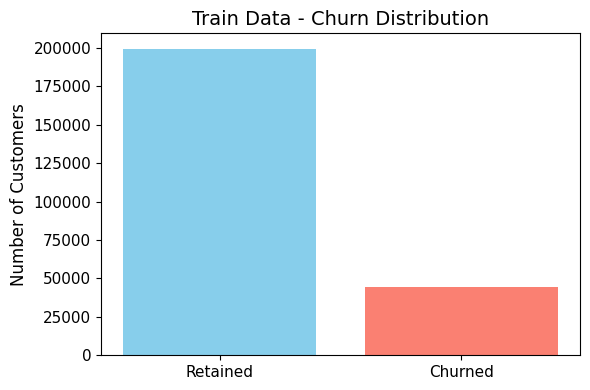

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
counts = train["Churn"].value_counts()
bars = plt.bar(["Retained", "Churned"], counts, color=["skyblue", "salmon"])
plt.title("Train Data - Churn Distribution", fontsize=14)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


In [6]:
test.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036194,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


Checking Data types

In [7]:
print(train.shape, test.shape)
print(train.dtypes)

(243787, 21) (104480, 20)
AccountAge                    int64
MonthlyCharges              float64
TotalCharges                float64
SubscriptionType             object
PaymentMethod                object
PaperlessBilling             object
ContentType                  object
MultiDeviceAccess            object
DeviceRegistered             object
ViewingHoursPerWeek         float64
AverageViewingDuration      float64
ContentDownloadsPerMonth      int64
GenrePreference              object
UserRating                  float64
SupportTicketsPerMonth        int64
Gender                       object
WatchlistSize                 int64
ParentalControl              object
SubtitlesEnabled             object
CustomerID                   object
Churn                         int64
dtype: object


Checking for Missing Values

In [8]:
print(train.isna().sum().sort_values(ascending=False))

AccountAge                  0
ContentDownloadsPerMonth    0
CustomerID                  0
SubtitlesEnabled            0
ParentalControl             0
WatchlistSize               0
Gender                      0
SupportTicketsPerMonth      0
UserRating                  0
GenrePreference             0
AverageViewingDuration      0
MonthlyCharges              0
ViewingHoursPerWeek         0
DeviceRegistered            0
MultiDeviceAccess           0
ContentType                 0
PaperlessBilling            0
PaymentMethod               0
SubscriptionType            0
TotalCharges                0
Churn                       0
dtype: int64


There are no missing values and we donot need to do any imputation

In [9]:
numerical_features = ['AccountAge'
,'MonthlyCharges'
,'TotalCharges'
,'ViewingHoursPerWeek'
,'AverageViewingDuration'
,'ContentDownloadsPerMonth'
,'UserRating'
,'SupportTicketsPerMonth'
,'WatchlistSize']

categorical_features = [
    'SubscriptionType'
,'PaymentMethod'
,'PaperlessBilling'
,'ContentType'
,'MultiDeviceAccess'
,'DeviceRegistered'
,'GenrePreference'
,'Gender'
,'ParentalControl'
,'SubtitlesEnabled'
]

In [10]:
X = train.drop(['CustomerID','Churn'],axis = 1)
y = train['Churn']

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
]) #this pipeline fills in missing numeric values with the median of that column, as median is robust to the outliers unlike mean
   #standardScaler() transforms numeric features so they have mean = 0 and standard deviation = 1, standardizing helps the optimizer converge faster and prevents large-scale features from dominating smaller ones
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")), #fills missing categorical values with most frequently occuring one
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
]) #one hot encoder converts categories into a set of binary coluns, one for each unique category
   #handle_unknown = 'ignore' prevents the model from crashing if a new category appears in the future data that wasn't in the training

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numerical_features),
    ("cat", categorical_transformer, categorical_features)
])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from scikeras.wrappers import KerasClassifier, KerasRegressor

def create_ann(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

keras_model = KerasClassifier(build_fn=lambda: create_ann(input_dim=preprocessor.fit(X_train).transform(X_train).shape[1]),
                              epochs=30,
                              batch_size=32,
                              verbose=0)


nn_pipeline = Pipeline([
    ('pre', preprocessor),
    ('clf', keras_model)
])

nn_pipeline

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['AccountAge',
                                                   'MonthlyCharges',
                                                   'TotalCharges',
                                                   'ViewingHoursPerWeek',
                                                   'AverageViewingDuration',
                                                   'ContentDownloadsPerMonth',
                                                   'UserRating',
                                                   'SupportTicketsPerMonth',
                                                   'WatchlistSize']),
                                                 ('cat',
                                                  Pipeline(steps...
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['SubscriptionType',
                                                   'PaymentMethod',
                                                   'PaperlessBilling',
                                                   'ContentType',
                                                   'MultiDeviceAccess',
                                                   'DeviceRegistered',
                                                   'GenrePreference', 'Gender',
                                                   'ParentalControl',
                                                   'SubtitlesEnabled'])])),
                ('clf',
                 KerasClassifier(batch_size=32, build_fn=<function <lambda> at 0x000001B7D34D65C0>, epochs=30, verbose=0))])

In [14]:
nn_pipeline.fit(X_train, y_train)


c:\Users\Rakshya\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Rakshya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['AccountAge',
                                                   'MonthlyCharges',
                                                   'TotalCharges',
                                                   'ViewingHoursPerWeek',
                                                   'AverageViewingDuration',
                                                   'ContentDownloadsPerMonth',
                                                   'UserRating',
                                                   'SupportTicketsPerMonth',
                                                   'WatchlistSize']),
                                                 ('cat',
                                                  Pipeline(steps...
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['SubscriptionType',
                                                   'PaymentMethod',
                                                   'PaperlessBilling',
                                                   'ContentType',
                                                   'MultiDeviceAccess',
                                                   'DeviceRegistered',
                                                   'GenrePreference', 'Gender',
                                                   'ParentalControl',
                                                   'SubtitlesEnabled'])])),
                ('clf',
                 KerasClassifier(batch_size=32, build_fn=<function <lambda> at 0x000001B7D34D65C0>, epochs=30, verbose=0))])

In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

y_pred = nn_pipeline.predict(X_valid)
y_prob = nn_pipeline.predict_proba(X_valid)[:, 1]

print("Validation accuracy:", accuracy_score(y_valid, y_pred))
print("Validation ROC-AUC:", roc_auc_score(y_valid, y_prob))
print(classification_report(y_valid, y_pred))

Validation accuracy: 0.8235571598506912
Validation ROC-AUC: 0.751828379778137
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     39921
           1       0.57      0.11      0.18      8837

    accuracy                           0.82     48758
   macro avg       0.70      0.55      0.54     48758
weighted avg       0.78      0.82      0.77     48758



In [16]:
#cross validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(nn_pipeline, X, y, cv=3, scoring="roc_auc")
print("Cross Validation Scores: ", scores)
print("Average ROC-AUC:", scores.mean())


c:\Users\Rakshya\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Rakshya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Rakshya\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Rakshya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\lay

Cross Validation Scores:  [0.74650583 0.74321953 0.75088391]
Average ROC-AUC: 0.746869754984974


In [17]:
#tuning hyperparameters, automating the best training setup (epochs, batch size) for  neural network using cross-validation and ROC-AUC as the benchmark.

from sklearn.model_selection import GridSearchCV
param_grid = {
    "clf__epochs": [20, 40],
    "clf__batch_size": [32, 64]
}
search = GridSearchCV(nn_pipeline, param_grid, cv=3, scoring="roc_auc")
search.fit(X, y)
print(search.best_params_, search.best_score_)

c:\Users\Rakshya\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Rakshya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Rakshya\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Rakshya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\lay

{'clf__batch_size': 32, 'clf__epochs': 20} 0.7474153335415873


In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from scikeras.wrappers import KerasClassifier

# reuse your existing `preprocessor`, X, y, X_train, X_valid, y_train, y_valid
input_dim = preprocessor.fit_transform(X_train).shape[1]

def build_ann():
    model = Sequential([
        Dense(256, activation="relu", input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.35),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.35),
        Dense(64, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["AUC","accuracy"])
    return model

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True, monitor="val_auc", mode="max"),
    ReduceLROnPlateau(patience=3, factor=0.5, monitor="val_auc",  mode="max")
]

ann_clf = KerasClassifier(
    build_fn=build_ann,
    epochs=60,
    batch_size=64,
    verbose=0,
    callbacks=callbacks,
    validation_split=0.2
)

ann_pipe = Pipeline([
    ("pre", preprocessor),
    ("clf", ann_clf)
])

ann_pipe.fit(X_train, y_train)
print("Valid ROC-AUC:", roc_auc_score(y_valid, ann_pipe.predict_proba(X_valid)[:,1]))


c:\Users\Rakshya\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Rakshya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Rakshya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,accuracy,loss,val_AUC,val_accuracy,val_loss
  current = self.get_monitor_value(logs)
c:\Users\Rakshya\AppData\Local\Programs\Python\

Valid ROC-AUC: 0.7440837670921514
